**semantic scolar**

by design semanti scholar academic graph API's paper search endpoints only match your query against the title and abstact of each paper .

In [173]:
import requests
import pandas as pd
import time

# Basic search parameters
url = "https://api.semanticscholar.org/graph/v1/paper/search/bulk"
params = {
    'query': 'cloud security ',
    'fields': 'title,authors,venue,publicationVenue,year,publicationDate,citationCount,abstract,influentialCitationCount,fieldsOfStudy,publicationTypes',
    'limit': 500
}

# Optional: Include your API key if you have one
# headers = {
#     'x-api-key': 'YOUR_API_KEY'
# }

max_retries = 5  # Maximum number of retries
retry_delay = 60  # Delay in seconds before retrying

for attempt in range(max_retries):
    response = requests.get(url, params=params)  # Add headers=headers if using an API key
    if response.status_code == 200:
        data = response.json()
        print(data)
        break  # Exit the loop if the request was successful
    elif response.status_code == 429:
        print(f"Too many requests. Waiting for {retry_delay} seconds before retrying...")
        time.sleep(retry_delay)  # Wait before retrying
    else:
        print(f"Request failed with status code: {response.status_code}")
        break  # Exit the loop on other errors

# If you want to process the data further, you can do so here

{'total': 67714, 'token': 'PCOKWVSKJJGM4TWNJNI3EUSQJIWVNUSRKBFEYK2JFUBHFI4VBSGC3DKSZXGSYU4M2NGAYUYMZWGSYLCTCIG4YEZNKIJQ3TGS2JGC3TGTRQGUZTOMSRRGWAPJCQJ6Q', 'data': [{'paperId': '0002b039d535279ca348c365b407c05e0784e73f', 'publicationVenue': {'id': '228761ec-c40a-479b-8309-9dcbe9851bcd', 'name': 'IEEE Internet of Things Journal', 'type': 'journal', 'alternate_names': ['IEEE Internet Thing J'], 'issn': '2327-4662', 'url': 'https://www.ieee.org/membership-catalog/productdetail/showProductDetailPage.html?product=PER288-ELE', 'alternate_urls': ['https://ieeexplore.ieee.org/servlet/opac?punumber=6488907', 'https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=6488907', 'http://ieee-iotj.org/#']}, 'title': 'Toward Verifiable Phrase Search Over Encrypted Cloud-Based IoT Data', 'abstract': None, 'venue': 'IEEE Internet of Things Journal', 'year': 2021, 'citationCount': 11, 'influentialCitationCount': 0, 'openAccessPdf': {'url': '', 'status': None, 'license': None, 'disclaimer': "Notice: This 

In [174]:
# Debug print to check keys for the first paper
if data.get('data'):
    print("Available keys in first paper:", data['data'][0].keys())

papers = data.get('data', [])
rows = []
for paper in papers:
    # Safely handle the possibility of publicationVenue being None
    pub_venue = paper.get('publicationVenue') or {}
    pub_venue_name = pub_venue.get('name') if isinstance(pub_venue, dict) else paper.get('venue')
    pub_venue_type = pub_venue.get('type') if isinstance(pub_venue, dict) else 'unknown'
    
    # Get publication date with a fallback value (if missing, use 'Unknown')
    pub_date = paper.get('publicationDate', 'Unknown')
    
    # Extract author names
    authors = paper.get('authors', [])
    author_names = [author.get('name', '') for author in authors]
    
    # Build row dictionary
    row = {
        'Title': paper.get('title', ''),
        'Abstract': paper.get('abstract', ''),
        'PublicationVenueName': pub_venue_name or paper.get('venue'),
        'PublicationVenueType': pub_venue_type,
        'Year': paper.get('year', None),
        'ReferenceCount': paper.get('referenceCount', None),
        'CitationCount': paper.get('citationCount', None),
        'InfluentialCitationCount': paper.get('influentialCitationCount', None),
        'FieldsOfStudy': paper.get('fieldsOfStudy', []),
        'PublicationTypes': paper.get('publicationTypes', []),
        'PublicationDate': pub_date,
        'Authors': ', '.join(author_names) if author_names else None
    }
    rows.append(row)

# Create DataFrame and display the first few rows
sem_df = pd.DataFrame(rows)
sem_df.head(2)

Available keys in first paper: dict_keys(['paperId', 'publicationVenue', 'title', 'abstract', 'venue', 'year', 'citationCount', 'influentialCitationCount', 'openAccessPdf', 'fieldsOfStudy', 'publicationTypes', 'publicationDate', 'authors'])


,Title,Abstract,PublicationVenueName,PublicationVenueType,Year,ReferenceCount,CitationCount,InfluentialCitationCount,FieldsOfStudy,PublicationTypes,PublicationDate,Authors
0,Toward Verifiable Phrase Search Over Encrypted...,None,IEEE Internet of Things Journal,journal,2021.0,None,11,0,[Computer Science],[JournalArticle],2021-08-15,"Xinrui Ge, Jia Yu, Fei Chen, Fanyu Kong, Huaqu..."
1,Online Data Security for Secure Cloud Storage,The capacity benefit given by cloud server is ...,International Journal of Innovative Technology...,None,2019.0,None,1,0,None,None,2019-12-14,None


In [175]:
len(sem_df)

1000

In [176]:
sem_df.columns

Index(['Title', 'Abstract', 'PublicationVenueName', 'PublicationVenueType',
       'Year', 'ReferenceCount', 'CitationCount', 'InfluentialCitationCount',
       'FieldsOfStudy', 'PublicationTypes', 'PublicationDate', 'Authors'],
      dtype='object')

Text(0.5, 1.0, 'Publications per Year')

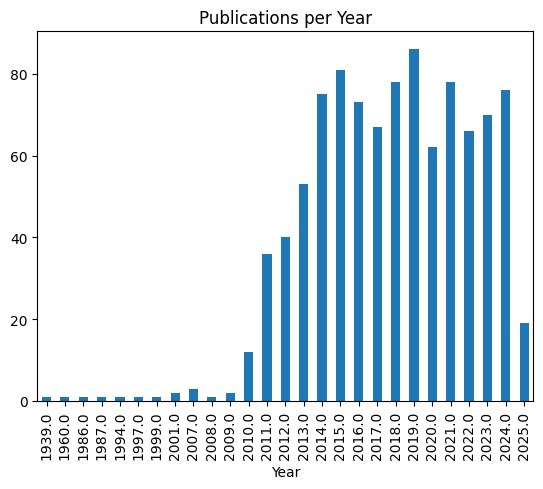

In [177]:
import matplotlib.pyplot as plt
sem_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Publications per Year")

In [178]:
sem_df['year'] = pd.to_datetime(sem_df['PublicationDate'], errors='coerce').dt.year
    
    # Convert to integer (NaN becomes <NA> which is better for visualization)
sem_df['year'] = sem_df['year'].astype('Int64')

In [179]:
# Top 10 influential papers
sem_df.sort_values('InfluentialCitationCount', ascending=False).head(10)

,Title,Abstract,PublicationVenueName,PublicationVenueType,Year,ReferenceCount,CitationCount,InfluentialCitationCount,FieldsOfStudy,PublicationTypes,PublicationDate,Authors,year
869,Secure Ranked Keyword Search over Encrypted Cl...,None,IEEE International Conference on Distributed C...,conference,2010.0,None,947,52,[Computer Science],"[JournalArticle, Conference]",2010-06-21,"Cong Wang, N. Cao, Jin Li, K. Ren, Wenjing Lou",2010
640,A Review on the Use of Blockchain for the Inte...,The paradigm of Internet of Things (IoT) is pa...,IEEE Access,journal,2018.0,None,777,36,[Computer Science],"[JournalArticle, Review]",2018-05-31,"T. Fernández-Caramés, Paula Fraga-Lamas",2018
967,Industrial Internet: A Survey on the Enabling ...,None,IEEE Communications Surveys and Tutorials,journal,2017.0,None,352,20,[Computer Science],"[JournalArticle, Review]",2017-04-05,"Jian-qiang Li, F. Yu, Genqiang Deng, Chengwen ...",2017
173,The Snowflake Elastic Data Warehouse,None,SIGMOD Conference,None,2016.0,None,297,18,[Computer Science],"[JournalArticle, Book, Conference]",2016-06-14,"B. Dageville, Thierry Cruanes, M. Zukowski, V....",2016
307,Flexible and Fine-Grained Attribute-Based Data...,None,IEEE Transactions on Services Computing,journal,2017.0,None,239,14,[Computer Science],[JournalArticle],2017-09-01,"Jiguo Li, Wei Yao, Yichen Zhang, Huiling Qian,...",2017
535,Cloud Computing: Security Issues and Research ...,None,,None,2011.0,None,231,13,[Computer Science],None,None,"R. Padhy, M. Patra, S. Satapathy, Oracle India...",<NA>
699,A Distributed Access Control Architecture for ...,None,IEEE Software,journal,2012.0,None,159,12,[Computer Science],[JournalArticle],2012-03-01,"Abdulrahman Almutairi, M. Sarfraz, Saleh M. Ba...",2012
417,When Geo-Text Meets Security: Privacy-Preservi...,None,IEEE International Conference on Data Engineering,conference,2019.0,None,45,12,[Computer Science],"[JournalArticle, Conference]",2019-04-01,"Ningning Cui, Jianxin Li, Xiaochun Yang, Bing ...",2019
731,Data security in cloud computing,None,International Conference on Crowd Science and ...,conference,2013.0,None,192,11,[Computer Science],[Conference],2013-04-26,D. Meng,2013
551,A Review on the State-of-the-Art Privacy-Prese...,None,IEEE journal of biomedical and health informatics,journal,2014.0,None,301,11,"[Computer Science, Medicine]","[Review, JournalArticle]",2014-01-16,"Assad Abbas, S. Khan",2014


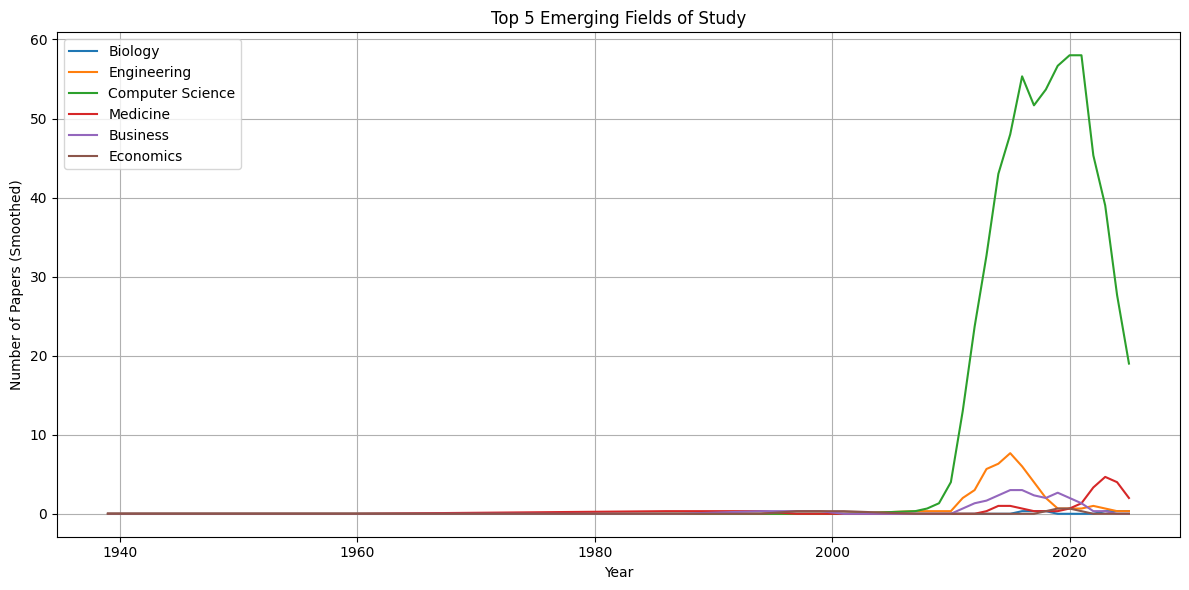

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Explode FieldsOfStudy so each field gets its own row
df_exploded = sem_df.explode('FieldsOfStudy')

# Group by Year and Field, then count papers
field_counts = (
    df_exploded
    .groupby(['Year', 'FieldsOfStudy'])
    .size()
    .reset_index(name='PaperCount')
)

# Pivot for heatmap-style analysis or trend lines
field_pivot = field_counts.pivot(index='Year', columns='FieldsOfStudy', values='PaperCount').fillna(0)

# Optional: Smooth with rolling average (e.g., 3 years)
field_pivot_smooth = field_pivot.rolling(window=3, min_periods=1).mean()

# Plot top 5 trending fields by recent growth
recent_years = field_pivot_smooth.index[-3:]  # Last 3 years
growth = field_pivot_smooth.loc[recent_years].pct_change().mean()
top_growth_fields = growth.sort_values(ascending=False).head(6).index

# Plot trends
plt.figure(figsize=(12, 6))
for field in top_growth_fields:
    plt.plot(field_pivot_smooth.index, field_pivot_smooth[field], label=field)

plt.title('Top 5 Emerging Fields of Study')
plt.xlabel('Year')
plt.ylabel('Number of Papers (Smoothed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


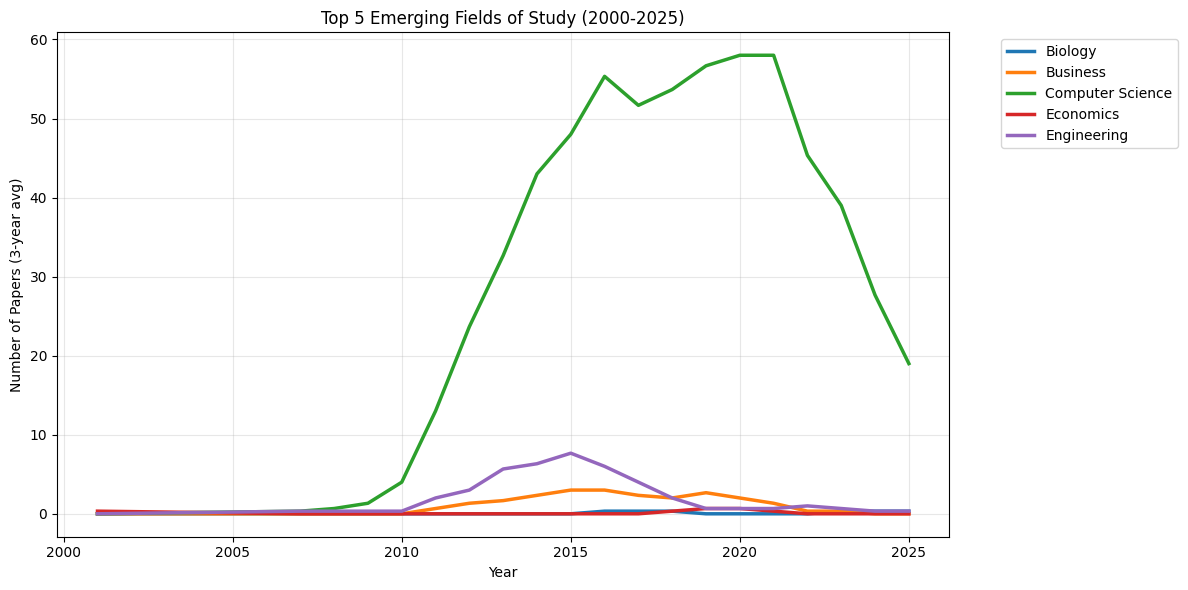

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider

def plot_field_trends(sem_df, start_year=None, end_year=None, window_size=3, top_n=5):
    """
    Visualize top trending fields of study with customizable year window.
    
    Args:
        sem_df (pd.DataFrame): DataFrame containing 'Year' and 'FieldsOfStudy' columns
        start_year (int): First year to display (None for auto)
        end_year (int): Last year to display (None for auto)
        window_size (int): Years for rolling average (smoothing)
        top_n (int): Number of top fields to show
    """
    # Explode fields and count papers per year/field
    df_exploded = sem_df.explode('FieldsOfStudy')
    field_counts = (
        df_exploded
        .groupby(['Year', 'FieldsOfStudy'])
        .size()
        .reset_index(name='PaperCount')
    )
    
    # Pivot and smooth with rolling average
    field_pivot = field_counts.pivot(index='Year', columns='FieldsOfStudy', values='PaperCount').fillna(0)
    field_pivot_smooth = field_pivot.rolling(window=window_size, min_periods=1).mean()
    
    # Filter by year window
    if start_year is None:
        start_year = field_pivot_smooth.index.min()
    if end_year is None:
        end_year = field_pivot_smooth.index.max()
    
    filtered = field_pivot_smooth.loc[start_year:end_year]
    
    # Calculate growth rates in the selected window
    growth = filtered.pct_change().mean()
    top_fields = growth.sort_values(ascending=False).head(top_n).index
    
    # Plotting
    plt.figure(figsize=(12, 6))
    for field in top_fields:
        plt.plot(filtered.index, filtered[field], label=field, linewidth=2.5)
    
    plt.title(f'Top {top_n} Emerging Fields of Study ({start_year}-{end_year})')
    plt.xlabel('Year')
    plt.ylabel(f'Number of Papers ({window_size}-year avg)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def interactive_field_trends(sem_df):
    """Create interactive widget for exploring trends"""
    years = sem_df['Year'].dropna().astype(int).unique()
    min_year, max_year = min(years), max(years)
    
    interact(
        plot_field_trends,
        sem_df=pd.DataFrame(sem_df),  # Fixed value
        start_year=IntSlider(min=min_year, max=max_year, value=min_year, step=1, description='Start Year'),
        end_year=IntSlider(min=min_year, max=max_year, value=max_year, step=1, description='End Year'),
        window_size=IntSlider(min=1, max=5, value=3, step=1, description='Smoothing'),
        top_n=IntSlider(min=3, max=10, value=5, step=1, description='Top N Fields')
    )

# Usage:
# For static plot with custom window:
plot_field_trends(sem_df, start_year=2000, end_year=2025, window_size=3, top_n=5)

# For interactive exploration in Jupyter:
# interactive_field_trends(sem_df)

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_field_trends(sem_df, fields_to_plot=None, smoothing_window=3, figsize=(12, 6)):
    """
    Plot trends of specified fields of study over time, or top growing fields if none specified.
    
    Parameters:
    - sem_df: Input DataFrame containing 'Year' and 'FieldsOfStudy' columns
    - fields_to_plot: List of specific fields to plot (if None, plots top 5 growing fields)
    - smoothing_window: Number of years for rolling average smoothing
    - figsize: Size of the output figure
    """
    # Explode FieldsOfStudy so each field gets its own row
    df_exploded = sem_df.explode('FieldsOfStudy')
    
    # Group by Year and Field, then count papers
    field_counts = (
        df_exploded
        .groupby(['Year', 'FieldsOfStudy'])
        .size()
        .reset_index(name='PaperCount')
    )
    
    # Pivot for heatmap-style analysis or trend lines
    field_pivot = field_counts.pivot(index='Year', columns='FieldsOfStudy', values='PaperCount').fillna(0)
    
    # Smooth with rolling average
    field_pivot_smooth = field_pivot.rolling(window=smoothing_window, min_periods=1).mean()
    
    # Determine which fields to plot
    if fields_to_plot is None:
        # Calculate top growing fields if none specified
        recent_years = field_pivot_smooth.index[-3:]  # Last 3 years
        growth = field_pivot_smooth.loc[recent_years].pct_change().mean()
        fields_to_plot = growth.sort_values(ascending=False).head(5).index
        plot_title = 'Top 5 Emerging Fields of Study'
    else:
        # Use specified fields, filtering to only those available in data
        available_fields = [f for f in fields_to_plot if f in field_pivot_smooth.columns]
        if not available_fields:
            raise ValueError("None of the specified fields were found in the data")
        fields_to_plot = available_fields
        plot_title = 'Trends for Selected Fields of Study'
    
    # Plot trends
    plt.figure(figsize=figsize)
    for field in fields_to_plot:
        plt.plot(field_pivot_smooth.index, field_pivot_smooth[field], label=field)
    
    plt.title(plot_title)
    plt.xlabel('Year')
    plt.ylabel(f'Number of Papers (Smoothed, {smoothing_window}-year avg)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# To plot specific fields:
# plot_field_trends(sem_df, fields_to_plot=['Machine Learning', 'Neuroscience', 'Physics'])

# To plot top growing fields:
# plot_field_trends(sem_df)

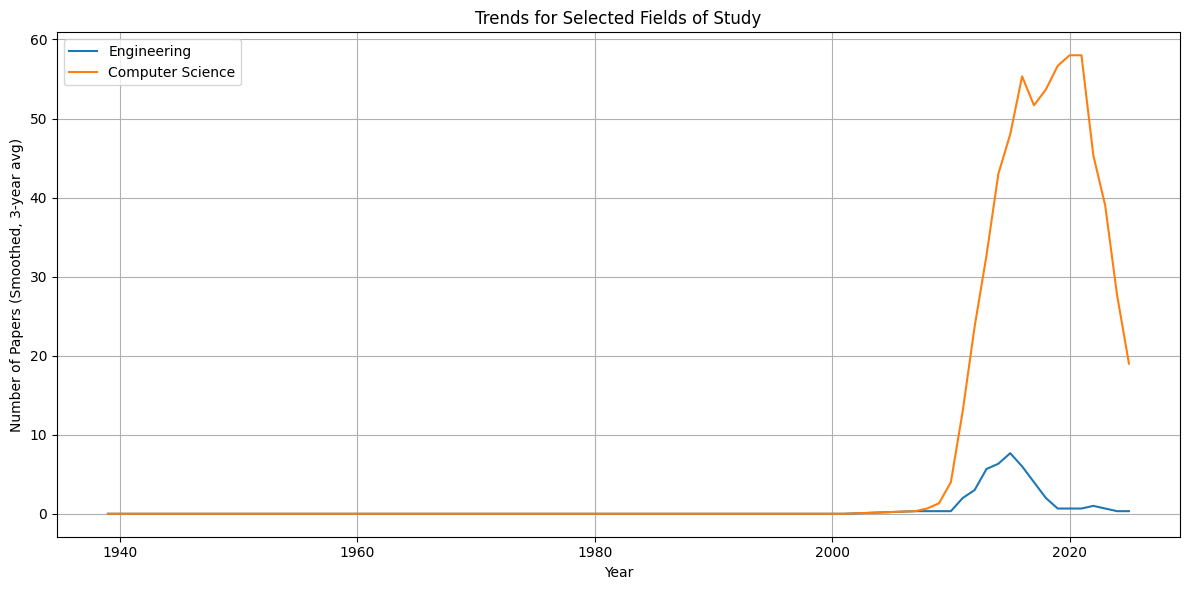

In [182]:
plot_field_trends(sem_df, fields_to_plot=['Materials Science', 'Engineering','Computer Science'])

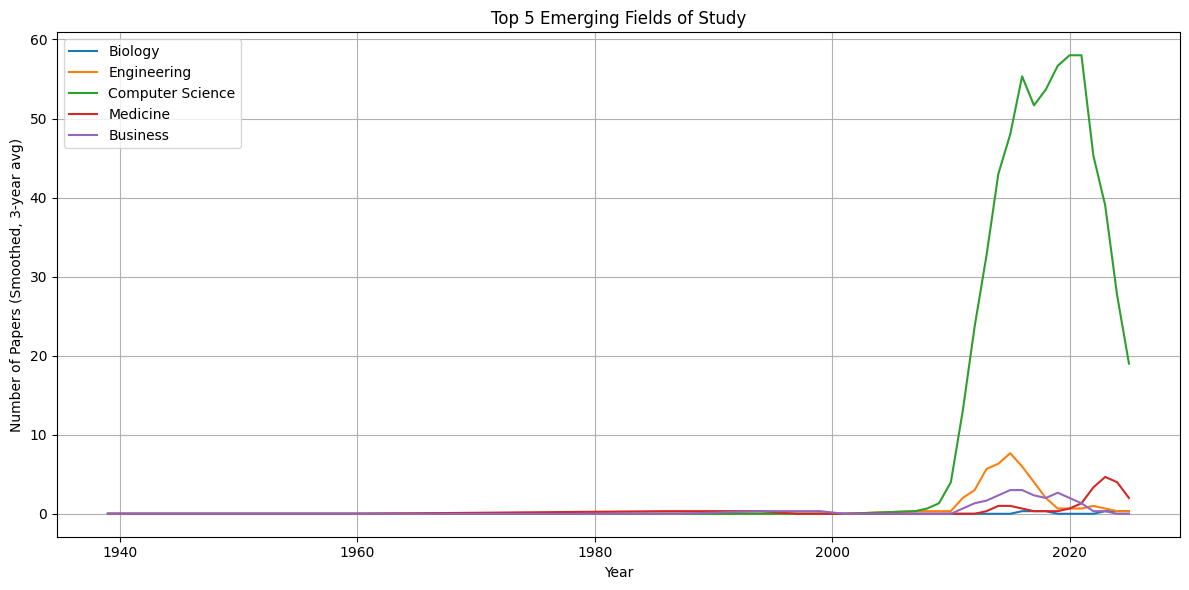

In [183]:
plot_field_trends(sem_df)

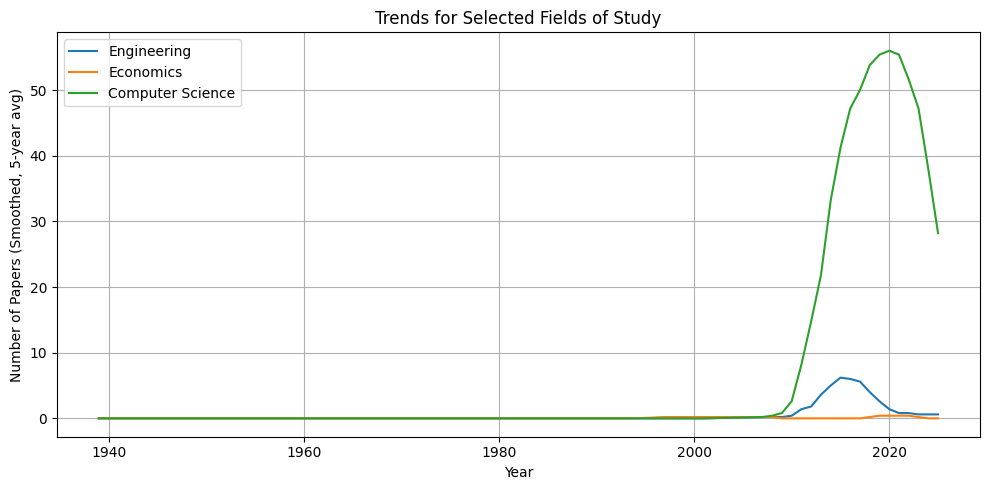

In [184]:
plot_field_trends(sem_df, 
                 fields_to_plot=['Engineering', 'Economics', 'Computer Science'], 
                 smoothing_window=5, 
                 figsize=(10, 5))

google scolar

In [108]:
import requests
import time
import json

# API details
url = "https://www.searchapi.io/api/v1/search"
api_key = "Qeg1buThqizr68MqzRKFLpEN"
query = "wind turbine"

all_results = []

# Loop through pages 1 to 50
for page in range(1, 51):
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 20,
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Error on page {page}: {response.status_code}")
        continue
    
    data = response.json()
    organic_results = data.get("organic_results", [])
    all_results.extend(organic_results)
    
    time.sleep(1)  # polite delay, can reduce or remove if needed

# Save all results as JSON
# with open("langchain_results.json", "w", encoding='utf-8') as f:
#     json.dump(all_results, f, ensure_ascii=False, indent=2)

# print(f"Saved {len(all_results)} results to langchain_results.json")


Error on page 1: 429
Error on page 2: 429
Error on page 3: 429
Error on page 4: 429
Error on page 5: 429
Error on page 6: 429
Error on page 7: 429
Error on page 8: 429
Error on page 9: 429
Error on page 10: 429
Error on page 11: 429
Error on page 12: 429
Error on page 13: 429
Error on page 14: 429
Error on page 15: 429
Error on page 16: 429
Error on page 17: 429
Error on page 18: 429
Error on page 19: 429
Error on page 20: 429
Error on page 21: 429
Error on page 22: 429
Error on page 23: 429
Error on page 24: 429
Error on page 25: 429
Error on page 26: 429
Error on page 27: 429
Error on page 28: 429
Error on page 29: 429
Error on page 30: 429
Error on page 31: 429
Error on page 32: 429
Error on page 33: 429
Error on page 34: 429
Error on page 35: 429
Error on page 36: 429
Error on page 37: 429
Error on page 38: 429
Error on page 39: 429
Error on page 40: 429
Error on page 41: 429
Error on page 42: 429
Error on page 43: 429
Error on page 44: 429
Error on page 45: 429
Error on page 46: 4

google news

In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

KeyError: "['Title', 'Source', 'RelativeDate', 'Snippet'] not in index"

In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."


**google patents**

In [ ]:
import requests

params = {
    "engine": "google_patents",
    "q": "technology trend monitoring",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"  # Replace with your key
}

response = requests.get("https://www.searchapi.io/api/v1/search", params=params)
gpdata = response.json()
gpdata.keys()

dict_keys(['search_metadata', 'search_parameters', 'search_information', 'organic_results', 'summary', 'pagination'])

In [ ]:
if 'organic_results' in gpdata and gpdata['organic_results'] : 
  print(gpdata['organic_results'][0].keys())

dict_keys(['position', 'rank', 'patent_id', 'title', 'snippet', 'priority_date', 'filing_date', 'grant_date', 'publication_date', 'inventor', 'assignee', 'publication_number', 'language', 'pdf', 'country_status'])


**google scolar**

In [ ]:
import requests
import time  # in case we want to be polite and add delays
import pandas as pd

# Setup
url = "https://www.searchapi.io/api/v1/search"
api_key = "BdVJ9kUYpdfAw6RYXy1t6KQm"

# Parameters
query = "Langchain"
results = []

# Loop through first 50 pages
for page in range(1, 6):  # Pages 1 to 50
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 30,         # max per page
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Failed on page {page}: {response.status_code}")
        continue

    gsc_data = response.json()
    gsc_data.keys()
  

print(f"Scraped {len(gsc_data)} results across 5 pages.")


Scraped 0 results across 5 pages.


In [ ]:
#gsc_data.to_excel('google_scolar_data.xlsx')

In [138]:
import requests
import time  # in case we want to be polite and add delays
import pandas as pd

# Setup
url = "https://www.searchapi.io/api/v1/search"
api_key = "BdVJ9kUYpdfAw6RYXy1t6KQm"

# Parameters
query = "allintitle: wind turbine"

results = []

# Loop through first 50 pages
for page in range(1, 21):  # Pages 1 to 50
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 20,         # max per page
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Failed on page {page}: {response.status_code}")
        continue

    data = response.json()
    
    # Extract and add the organic results
    organic_results = data.get("organic_results", [])
    results.extend(organic_results)
    
    # Optional: Be polite to the API (1-second delay)
    time.sleep(1)

# Convert to DataFrame
gsc_data = pd.DataFrame(results)

# Export to Excel
#df.to_excel("langchain_scholar_results.xlsx", index=False)

print(f"Scraped {len(results)} results across 50 pages.")


Scraped 400 results across 50 pages.


In [139]:
import pandas as pd

def parse_scholar_results(results):
    """
    Parses Google Scholar API results into a structured DataFrame.
    
    Args:
        results (list): List of dictionaries from Google Scholar API
        
    Returns:
        pd.DataFrame: Structured DataFrame with relevant columns
    """
    parsed_data = []
    
    for item in results:
        entry = {
            'position': item.get('position'),
            'title': item.get('title'),
            'link': item.get('link'),
            'publication': item.get('publication'),
            'snippet': item.get('snippet'),
            'citations_total': item.get('inline_links', {}).get('cited_by', {}).get('total'),
            'citations_link': item.get('inline_links', {}).get('cited_by', {}).get('link'),
            'versions_total': item.get('inline_links', {}).get('versions', {}).get('total'),
            'versions_link': item.get('inline_links', {}).get('versions', {}).get('link'),
            'resource_name': item.get('resource', {}).get('name'),
            'resource_format': item.get('resource', {}).get('format'),
            'resource_link': item.get('resource', {}).get('link'),
            'authors': ', '.join([a.get('name') for a in item.get('authors', [])]),
            'author_ids': ', '.join([a.get('id') for a in item.get('authors', [])]),
            'author_links': ', '.join([a.get('link') for a in item.get('authors', [])])
        }
        
        parsed_data.append(entry)
    
    df = pd.DataFrame(parsed_data)
    
    # Reorder columns for better organization
    column_order = [
        'position', 'title', 'authors', 'publication', 'snippet',
        'citations_total', 'citations_link', 'versions_total', 'versions_link',
        'resource_name', 'resource_format', 'resource_link', 'link',
        'author_ids', 'author_links'
    ]
    
    return df[column_order]

# Usage example:
parsed_df = parse_scholar_results(results)

In [140]:
import pandas as pd
import re

def extract_publication_year(df, column_name='publication'):
    """
    Extracts publication year from a column containing strings in the format:
    'Author - Publication Info, Year - Publisher'
    
    Args:
        df (pd.DataFrame): Input DataFrame
        column_name (str): Name of column containing publication info
        
    Returns:
        pd.DataFrame: Original DataFrame with new 'year' column
    """
    def _extract_year(entry):
        if pd.isna(entry) or not isinstance(entry, str):
            return None
        
        # Split into main components
        parts = entry.split(' - ')
        search_str = parts[1] if len(parts) >= 3 else entry
        
        # Find all 4-digit numbers that could represent years
        years = re.findall(r'\b(?:19|20)\d{2}\b', search_str)
        
        # Return the last found year (most likely the publication year)
        return int(years[-1]) if years else None

    df['year'] = df[column_name].apply(_extract_year)
    return df

In [141]:
parsed_df = extract_publication_year(parsed_df)

In [142]:
parsed_df.head()

,position,title,authors,publication,snippet,citations_total,citations_link,versions_total,versions_link,resource_name,resource_format,resource_link,link,author_ids,author_links,year
0,1,Wind turbine technology,,DA Spera - 1994 - osti.gov,"This book reviews advances in aerodynamics, st...",1514,https://scholar.google.com/scholar?cites=76694...,3.0,https://scholar.google.com/scholar?cluster=766...,None,None,None,https://www.osti.gov/biblio/6960578,,,1994
1,2,Wind-turbine and wind-farm flows: a review,"F Porté-Agel, M Bastankhah, S Shamsoddin","F Porté-Agel, M Bastankhah, S Shamsoddin - Bou...",… wind-turbine wake flows and their superposit...,962,https://scholar.google.com/scholar?cites=16006...,19.0,https://scholar.google.com/scholar?cluster=160...,springer.com,PDF,https://link.springer.com/content/pdf/10.1007/...,https://link.springer.com/article/10.1007/s105...,"XOg_DwcAAAAJ, 784pzQQAAAAJ, JoXCYtoAAAAJ",https://scholar.google.com/citations?user=XOg_...,2020
2,3,Wind turbine technology,,AR Jha - 2011 - books.google.com,… are considered ideal for wind turbine instal...,282,https://scholar.google.com/scholar?cites=15552...,3.0,https://scholar.google.com/scholar?cluster=155...,None,None,None,https://books.google.com/books?hl=en&lr=&id=ya...,,,2011
3,4,Wind power generation and wind turbine design,,W Tong - 2010 - books.google.com,… GW of new wind capacity were installed over ...,794,https://scholar.google.com/scholar?cites=51510...,NaN,None,None,None,None,https://books.google.com/books?hl=en&lr=&id=wU...,,,2010
4,5,Wind turbine design cost and scaling model,,"L Fingersh, M Hand, A Laxson - 2006 - osti.gov","… Beginning in late 2005, researchers at NREL’...",748,https://scholar.google.com/scholar?cites=98883...,13.0,https://scholar.google.com/scholar?cluster=988...,osti.gov,PDF,https://www.osti.gov/servlets/purl/897434,https://www.osti.gov/servlets/purl/897434,,,2006


In [196]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_filing_trends(df, year_col='year', title='Publication Trends'):
    """
    Creates an interactive visualization of publication trends over time.
    
    Args:
        df (pd.DataFrame): DataFrame containing year column
        year_col (str): Name of column containing publication years
        title (str): Chart title
        
    Returns:
        tuple: (fig, trend_df) Plotly figure and aggregated trend data
    """
    # Create aggregated data
    trend_df = df[year_col].value_counts().sort_index().reset_index()
    trend_df.columns = ['year', 'count']
    trend_df['cumulative'] = trend_df['count'].cumsum()
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Add bar chart for annual counts
    fig.add_trace(
        go.Bar(
            x=trend_df['year'],
            y=trend_df['count'],
            name='Annual Publications',
            marker_color='#1f77b4',
            hovertemplate='Year: %{x}<br>Annual: %{y}<extra></extra>'
        ),
        secondary_y=False
    )
    
    # Add line chart for cumulative trend
    fig.add_trace(
        go.Scatter(
            x=trend_df['year'],
            y=trend_df['cumulative'],
            name='Cumulative Total',
            line=dict(color='#ff7f0e', width=3),
            hovertemplate='Year: %{x}<br>Cumulative: %{y}<extra></extra>'
        ),
        secondary_y=True
    )
    
    # Update layout
    fig.update_layout(
        title_text=title,
        title_x=0.5,
        title_font_size=24,
        xaxis_title='Publication Year',
        yaxis_title='Annual Publications',
        yaxis2_title='Cumulative Publications',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        margin=dict(t=100),
        height=600
    )
    
    # Add range selector
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    
    return fig, trend_df

# Usage example:
# fig, trend_data = visualize_filing_trends(df_with_years)
# fig.show()

In [197]:
fig, trend_data = visualize_filing_trends(parsed_df)
fig.show()

In [198]:
#semantic scolar
fig, trend_data = visualize_filing_trends(sem_df)
fig.show()

In [200]:
def visualize_filing_trends(df, year_col='year', title='Paper Publication Trends'):
    """
    Creates an interactive visualization of publication trends over time,
    showing both the annual counts and the cumulative total as lines.
    """
    # Aggregate year counts
    trend_df = (
        df[year_col]
        .value_counts()
        .sort_index()
        .reset_index()
    )
    trend_df.columns = ['year', 'count']  # Rename columns explicitly
    trend_df['cumulative'] = trend_df['count'].cumsum()

    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Annual publications as a line
    fig.add_trace(
        go.Scatter(
            x=trend_df['year'],
            y=trend_df['count'],
            mode='lines+markers',
            name='Annual Publications',
            line=dict(color='#1f77b4', width=2),
            hovertemplate='Year: %{x}<br>Annual: %{y}<extra></extra>'
        ),
        secondary_y=False
    )

    # Cumulative total as a line
    fig.add_trace(
        go.Scatter(
            x=trend_df['year'],
            y=trend_df['cumulative'],
            mode='lines+markers',
            name='Cumulative Total',
            line=dict(color='#ff7f0e', width=2, dash='dash'),
            hovertemplate='Year: %{x}<br>Cumulative: %{y}<extra></extra>'
        ),
        secondary_y=True
    )

    # Update layout
    fig.update_layout(
        title_text=title,
        title_x=0.5,
        title_font_size=24,
        xaxis_title='Publication Year',
        yaxis_title='Annual Publications',
        yaxis2_title='Cumulative Publications',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        margin=dict(t=100),
        height=600
    )

    # Add range selector
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )

    return fig, trend_df


In [201]:
fig, trend_data = visualize_filing_trends(sem_df)
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_filing_trends(df, year_col='year', title='Patent Publication Trends'):
    """
    Creates an interactive visualization of publication trends over time,
    showing both the annual counts and the cumulative total as lines.
    """
    # Create aggregated data
    trend_df = (
        df[year_col]
        .value_counts()
        .sort_index()
        .reset_index()
        .rename(columns={'index': 'year', year_col: 'count'})
    )
    trend_df['cumulative'] = trend_df['count'].cumsum()

    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Annual publications as a line
    fig.add_trace(
        go.Scatter(
            x=trend_df['year'],
            y=trend_df['count'],
            mode='lines+markers',
            name='Annual Publications',
            line=dict(color='#1f77b4', width=2),
            hovertemplate='Year: %{x}<br>Annual: %{y}<extra></extra>'
        ),
        secondary_y=False
    )

    # Cumulative total as a line
    fig.add_trace(
        go.Scatter(
            x=trend_df['year'],
            y=trend_df['cumulative'],
            mode='lines+markers',
            name='Cumulative Total',
            line=dict(color='#ff7f0e', width=2, dash='dash'),
            hovertemplate='Year: %{x}<br>Cumulative: %{y}<extra></extra>'
        ),
        secondary_y=True
    )

    # Update layout
    fig.update_layout(
        title_text=title,
        title_x=0.5,
        title_font_size=24,
        xaxis_title='Publication Year',
        yaxis_title='Annual Publications',
        yaxis2_title='Cumulative Publications',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        margin=dict(t=100),
        height=600
    )

    # Add range selector
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )

    return fig, trend_df

# Usage:
# fig, trend_data = visualize_filing_trends(df_with_years)
# fig.show()


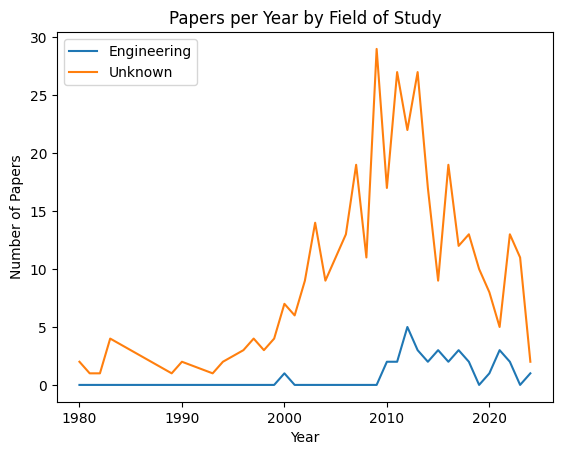

In [154]:
import pandas as pd
import re
import matplotlib.pyplot as plt


# 1) Extract year
def extract_year(pub):
    m = re.search(r'\b(19|20)\d{2}\b', pub)
    return int(m.group()) if m else None

#sem_df['year'] = sem_df['publication'].apply(extract_year)

# 2) Extract journal title
def extract_journal(pub):
    m = re.search(r'-\s*([^,]+?),\s*\d{4}', pub)
    return m.group(1).strip() if m else None

parsed_df['journal'] = parsed_df['publication'].apply(extract_journal)

# 3) Map journals to fields of study
journal_to_field = {
    # Energy & Power Engineering
    "Applied Energy": "Engineering",
    "Energy Conversion and Management": "Engineering",
    "Renewable Energy": "Engineering",
    "Renewable & Sustainable Energy Reviews": "Engineering",
    "International Journal of Energy Research": "Engineering",
    "IEEE Transactions on Energy Conversion": "Engineering",
    "Energy Sources, Part A": "Engineering",
    "Sustainable Energy Technologies and Assessments": "Engineering",

    # Mechanical & Aerospace Engineering
    "Journal of Wind Engineering and Industrial Aerodynamics": "Engineering",
    "International Journal of Mechanical Sciences": "Engineering",
    "ASME Journal of Heat and Mass Transfer": "Engineering",
    "International Journal of Engine Research": "Engineering",
    "Journal of Mechanical Design - Transactions of the ASME": "Engineering",
    "Mechanism and Machine Theory": "Engineering",
    "Journal of Vibration and Acoustics": "Engineering",
    "Journal of Aerospace Engineering": "Engineering",

    # Civil & Structural Engineering
    "Engineering Structures": "Engineering",
    "Journal of Building Engineering": "Engineering",
    "Construction and Building Materials": "Engineering",
    "Building and Environment": "Engineering",
    "Tunnelling and Underground Space Technology": "Engineering",
    "Engineering Geology": "Engineering",

    # Electrical & Electronics Engineering
    "IEEE Transactions on Industrial Electronics": "Engineering",
    "IEEE Transactions on Power Systems": "Engineering",
    "IEEE Transactions on Smart Grid": "Engineering",
    "IEEE Transactions on Power Delivery": "Engineering",
    "IEEE Transactions on Mobile Computing": "Engineering",
    "IEEE Transactions on Robotics": "Engineering",
    "IEEE Transactions on Automation Science and Engineering": "Engineering",
    "IEEE Transactions on Dependable and Secure Computing": "Engineering",

    # Chemical & Materials Engineering
    "Chemical Engineering Journal": "Engineering",
    "Journal of Energy Chemistry": "Engineering",
    "Process Safety and Environmental Protection": "Engineering",
    "Powder Technology": "Engineering",
    "Ceramics International": "Engineering",
    "International Journal of Heat and Mass Transfer": "Engineering",

    # Environmental Engineering
    "Journal of Cleaner Production": "Engineering",
    "Environmental Engineering Science": "Engineering",
    "Science of the Total Environment": "Engineering",
    "Environmental Science & Technology": "Engineering",

    # General & Interdisciplinary Engineering
    "Procedia Engineering": "Engineering",
    "Advances in Engineering Software": "Engineering",
    "Computers and Industrial Engineering": "Engineering",
    "International Journal of Production Economics": "Engineering",
    "Journal of Industrial Ecology": "Engineering",
    "Journal of Management in Engineering": "Engineering",
    "International Journal of Technology and Design Education": "Education",
    "International Journal of Flexible Manufacturing Systems": "Engineering",
    "International Journal of Fracture": "Engineering",
    "International Journal of Thermophysics": "Engineering",
    "Journal of Engineering Mathematics": "Engineering",
    "Journal of Engineering Physics and Thermophysics": "Engineering",
    "Journal of Fusion Energy": "Engineering",
    "Journal of Computational Electronics": "Engineering",
    "Journal of Elasticity": "Engineering",
    "International Journal of Mechanics of Solids": "Engineering",
    "International Journal of Automobile Engineering": "Engineering",
    "International Journal of Machine Tools and Maintenance Engineering": "Engineering",
    "Journal of Nanotechnology": "Nanotechnology",
    "Nano Energy": "Nanotechnology",
    "ACS Nano": "Nanotechnology",
    "Nano Research": "Nanotechnology",
    "Microsystems and Nanoengineering": "Nanotechnology",
    "Friction": "Engineering",
    "Soft Robotics": "Robotics",
    "IEEE Transactions on Intelligent Vehicles": "Engineering",
    "IEEE Vehicular Technology Magazine": "Engineering",
    "Journal of Ocean Engineering and Science": "Engineering",
    "Structural Health Monitoring": "Engineering",
    "Water Cycle": "Environmental Engineering",
    "ISA Transactions": "Engineering",
    "International Journal of Intelligent Networks": "Engineering",
    "Communications Materials": "Engineering",
    "npj Regenerative Medicine": "Engineering",
    "Current Opinion in Biotechnology": "Biotechnology",
    "IEEE Journal of Biomedical and Health Informatics": "Engineering",
    "IEEE Open Journal of Power Electronics": "Engineering",
    "IEEE Transactions on Network and Service Management": "Engineering",
    "Journal of Technology Transfer": "Technology Management",
    "Chinese Journal of Electrical Engineering": "Engineering",
    "CIRP Annals Manufacturing Technology": "Engineering",
    "Advances in Military Technology": "Engineering",
    "Acta Polytechnica": "Engineering",
    "International Journal of Electrical Power and Energy Systems": "Engineering",
    "International Journal of Impact Engineering": "Engineering",
    "International Journal of Electrical and Computer Engineering": "Engineering",
    "International Journal of Computer Engineering in Research Trends": "Engineering",
    "International Journal of Computer Engineering Research": "Engineering",
    "Journal of Computer Engineering & Information Technology": "Engineering",
    "International Journal of Computer Science and Information Technologies": "Computer Science",
    "Journal of Cloud Computing: Advances, Systems and Applications": "Computer Science",
    "International Journal of Advanced Computer Science and Applications": "Computer Science",
    "Journal of Information Processing Systems": "Computer Science",
    "Energies": "Engineering",
    "Electronics": "Engineering",
    "Journal of Electrical Engineering & Technology": "Engineering",
    "Advances in Electrical and Electronic Engineering": "Engineering",
    "SSRG International Journal of Electrical and Electronics Engineering": "Engineering",
    "SSRG International Journal of Mechanical Engineering": "Engineering",
    "International Journal of Mechanical Engineering": "Engineering",
    "International Journal of Mechanical Engineering and Applications": "Engineering",
    "Mechanical Engineering Research": "Engineering",
    "Frontiers in Mechanical Engineering": "Engineering",
    "Journal of Computational and Applied Mechanics": "Engineering",
    "Theoretical and Applied Mechanics Letters": "Engineering",
    "Advances in Mechanical Engineering": "Engineering",
    "International Journal of Materials Science": "Engineering",
    "International Journal of Mechanics of Solids": "Engineering",
    "International Journal of Automobile Engineering": "Engineering",
    "International Journal of Machine Tools and Maintenance Engineering": "Engineering",
    "International Journal of Advancements in Technology": "Engineering",
    "Journal of Aeronautics & Aerospace Engineering": " Engineering",
    "Journal of Information Technology & Software Engineering": "Engineering",
    "Advances in Automobile Engineering": "Engineering",
    "Global Journal of Engineering, Design & Technology": " Engineering"
}

parsed_df['fieldOfStudy'] = parsed_df['journal'].map(journal_to_field).fillna("Unknown")

# 4) Aggregate counts by year & field
counts = parsed_df.groupby(['year', 'fieldOfStudy']).size().reset_index(name='count')
pivot = counts.pivot(index='year', columns='fieldOfStudy', values='count').fillna(0)

# 5) Plot line chart
plt.figure()
for field in pivot.columns:
    plt.plot(pivot.index, pivot[field], label=field)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Papers per Year by Field of Study')
plt.legend()
plt.show()


In [132]:
parsed_df['publication'].iloc[55]

'EL Van der Hooft, P Schaak… - … -EH-03-094/0, Task-3 …, 2003 - publications.tno.nl'

In [112]:
if 'organic_results' in gsc_data and gsc_data['organic_results'] : 
  print(gsc_data['organic_results'][0].keys())

In [ ]:
# Let's inspect one search result
result = gsc_data["organic_results"][1]

for key in result:
    print(f"{key}: Type -> {type(result[key])}, Sample -> {result[key]}")


position: Type -> <class 'int'>, Sample -> 2
title: Type -> <class 'str'>, Sample -> Automated Generation and Evaluation of MultipleChoice Quizzes using Langchain and Gemini LLM
data_cid: Type -> <class 'str'>, Sample -> Qduivk7Vf4gJ
link: Type -> <class 'str'>, Sample -> https://ieeexplore.ieee.org/abstract/document/10739326/
publication: Type -> <class 'str'>, Sample -> P Pawar, R Dube, A Joshi, Z Gulhane… - … on Electrical Electronics …, 2024 - ieeexplore.ieee.org
snippet: Type -> <class 'str'>, Sample -> The research study investigates the use of cutting-edge technologies like Langchain and … uses Gemini AI to generate MCQs and Langchain for rapid engineering are covered in this …
inline_links: Type -> <class 'dict'>, Sample -> {'cited_by': {'cites_id': '9835814645382961985', 'total': 1, 'link': 'https://scholar.google.com/scholar?cites=9835814645382961985&as_sdt=40000005&sciodt=0,22&hl=en&num=20'}, 'related_articles_link': 'https://scholar.google.com/scholar?q=related:Qduivk7Vf4gJ

In [117]:
import pandas as pd

# Assuming data contains your JSON response
gsc_results = gsc_data.get("organic_results", [])
records = []

for item in gsc_results:
    # Extract authors names from each author dictionary.
    authors_list = item.get("authors", [])
    author_names = [author.get("name", "") for author in authors_list if isinstance(author, dict)]
    
    # Initialize citation_count
    citation_count = 0
    inline_links = item.get("inline_links", {})
    # Check if 'cited_by' exists and is a dict, then extract 'total'
    if isinstance(inline_links, dict) and 'cited_by' in inline_links:
        cited_by = inline_links.get("cited_by")
        if isinstance(cited_by, dict):
            citation_count = cited_by.get("total", 0)
    
    record = {
        "Title": item.get("title"),
        "Authors": ", ".join(author_names) if author_names else None,
        "Publication": item.get("publication"),
        "Snippet": item.get("snippet"),
        "Citation_Count": citation_count,
    }
    records.append(record)

gcs_df = pd.DataFrame(records)
gcs_df.head()




""


In [118]:
# Split the 'publication' column into three parts
gcs_df[['authors', 'venue', 'year_source']] = gcs_df['Publication'].str.split(' - ', n=2, expand=True)


KeyError: 'Publication'

In [ ]:
gcs_df.head()

,Title,Authors,Publication,Snippet,Citation_Count,authors,venue,year_source
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2,"A Ramprasad, P Sivakumar","2024 International Conference on …, 2024",ieeexplore.ieee.org
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1,"P Pawar, R Dube, A Joshi, Z Gulhane…","… on Electrical Electronics …, 2024",ieeexplore.ieee.org
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3,"A Saeed, N Dhanda, AS Rao…","2024 2nd International …, 2024",ieeexplore.ieee.org
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1,"S Rahayu, NS Harahap, S Agustian…","… : Indonesian Journal of …, 2024",journal.irpi.or.id
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8,C Yao,"arXiv preprint arXiv:2310.12430, 2023",arxiv.org


In [ ]:
def split_venue_year(row):
    val = row['venue']
    
    # If it's only a 4-digit year
    if val and len(val.strip()) == 4:
        return pd.Series({'venue': None, 'year': val.strip()})
    
    # If it contains a comma, split on the last comma
    if isinstance(val, str) and ',' in val:
        parts = val.rsplit(',', 1)
        return pd.Series({'venue': parts[0].strip(), 'year': parts[1].strip()})
    
    # Otherwise, return the venue as-is and year as None
    return pd.Series({'venue': val, 'year': None})

# Apply only after the first split
gcs_df[['venue', 'year']] = gcs_df.apply(split_venue_year, axis=1)


In [ ]:
gcs_df.head()

,Title,Authors,Publication,Snippet,Citation_Count,authors,venue,year_source,year
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2,"A Ramprasad, P Sivakumar",2024 International Conference on …,ieeexplore.ieee.org,2024
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1,"P Pawar, R Dube, A Joshi, Z Gulhane…",… on Electrical Electronics …,ieeexplore.ieee.org,2024
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3,"A Saeed, N Dhanda, AS Rao…",2024 2nd International …,ieeexplore.ieee.org,2024
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1,"S Rahayu, NS Harahap, S Agustian…",… : Indonesian Journal of …,journal.irpi.or.id,2024
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8,C Yao,arXiv preprint arXiv:2310.12430,arxiv.org,2023


In [ ]:
gcs_df.to_excel('gcs_df.xlsx')

**IEEE Xplore**

In [ ]:
import requests

API_KEY = "shrw4werbra7k85hqn6ghzr2"
response = requests.get(
    "http://ieeexploreapi.ieee.org/api/v1/search/articles",
    params={"querytext": "AI", "apikey": API_KEY}
)

print("Status Code:", response.status_code)  # Check if 200, 403, 429, etc.
print("Raw Response:", response.text)  # See what's actually returned

Status Code: 403
Raw Response: <h1>Developer Inactive</h1>


**google news**

In [1]:
import requests

url = "https://www.searchapi.io/api/v1/search"
params = {
  "engine": "google_news",
  "q": "hydrogen battery electric vehicle ",
  "location": "New York,United States",
  "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

response = requests.get(url, params=params)
news_data = response.json()
news_data.keys()


dict_keys(['error'])

In [2]:
if 'organic_results' in news_data and news_data['organic_results'] : 
  print(news_data['organic_results'][0].keys())

In [3]:
# Let's inspect one search result
news_result = news_data["organic_results"][4]

for key in news_result:
    print(f"{key}: Type -> {type(news_result[key])}, Sample -> {news_result[key]}")

KeyError: 'organic_results'

In [ ]:
import pandas as pd

# Suppose news_results is the list from your API response (i.e., response.json()['news_results'])
news_results = data.get("organic_results", [])

# Create a list of dictionaries with only the required keys
records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "Date": item.get("date"),
        "Snippet": item.get("snippet")
    }
    records.append(record)

# Create the DataFrame
df = pd.DataFrame(records)
df.head()


,Title,Source,Date,Snippet
0,Creating large language model applications utilizing lan...,None,None,… LangChain has been widely recognized in the AI communi...
1,Systematic literature review langchain proposed,None,None,While systematic literature reviews are frequently carri...
2,LangChain,None,None,… This paper provides an in-depth analysis of LangChain’...
3,Automating Customer Service using LangChain: Building cu...,None,None,"In the digital age, the dynamics of customer service are..."
4,LangChain v0. 3,None,None,… This paper provides an in-depth analysis of LangChain’...


In [ ]:
import pandas as pd

# Use the correct key for news results
news_results = data.get("organic_results", [])

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "Date": item.get("date"),
        "Snippet": item.get("snippet")
    }
    records.append(record)

df = pd.DataFrame(records)
df.head()


,Title,Source,Date,Snippet
0,Creating large language model applications utilizing lan...,None,None,… LangChain has been widely recognized in the AI communi...
1,Systematic literature review langchain proposed,None,None,While systematic literature reviews are frequently carri...
2,LangChain,None,None,… This paper provides an in-depth analysis of LangChain’...
3,Automating Customer Service using LangChain: Building cu...,None,None,"In the digital age, the dynamics of customer service are..."
4,LangChain v0. 3,None,None,… This paper provides an in-depth analysis of LangChain’...


Available keys in news items:
dict_keys(['position', 'title', 'link', 'source', 'date', 'snippet', 'favicon', 'thumbnail'])

Sample item structure:
{'position': 1, 'title': "Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 billion after Donald Trump's ‘discounted’ reciprocal", 'link': 'https://timesofindia.indiatimes.com/technology/tech-news/elon-musk-jeff-bezos-and-mark-zuckerberg-lose-42-6-billion-as-trump-announces-discounted-reciprocal-tariffs/articleshow/120010512.cms', 'source': 'Times of India', 'date': '12 hours ago', 'snippet': 'TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk collectively lost $42.6 billion in a day due to new tariffs announced by President...', 'favicon': '', 'thumbnail': ''}

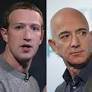

In [ ]:
# Print the structure of the first news result
if news_data.get("organic_results"):
    first_item = news_data["organic_results"][0]
    print("Available keys in news items:")
    print(first_item.keys())
    
    print("\nSample item structure:")
    print(first_item)

In [ ]:
import pandas as pd

news_results = news_data.get("organic_results", [])

records = []
for item in news_results:
    # Different APIs use different key names - adjust accordingly
    record = {
        "Title": item.get("title"),
        # Common variations for source
        "Source": item.get("source") or  # Nested source
                  item.get("publisher") or
                  item.get("site"),
        # Common variations for date
        "Date": item.get("date") or
                item.get("published_date") or
                item.get("pub_date"),
        "Snippet": item.get("snippet"),
        # Additional useful fields
        
    }
    records.append(record)

df = pd.DataFrame(records)
df.head()

,Title,Source,Date,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,"MacKenzie Scott has ""transformed"" philanthropy since her..."


In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."
